#    Forecasting using Data Driven Methos 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings

In [88]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


###   Converting Q1,Q2,A3,Q4 to dates 

In [89]:
dates = pd.date_range(start='1986', periods=42, freq='Q')
dates

DatetimeIndex(['1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31',
               '1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31', '1992-06-30', '1992-09-30', '1992-12-31',
               '1993-03-31', '1993-06-30', '1993-09-30', '1993-12-31',
               '1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [90]:
cocacola['date'] = pd.DataFrame(dates)
cocacola

,Quarter,Sales,date
0,Q1_86,1734.827000,1986-03-31
1,Q2_86,2244.960999,1986-06-30
2,Q3_86,2533.804993,1986-09-30
3,Q4_86,2154.962997,1986-12-31
4,Q1_87,1547.818996,1987-03-31
5,Q2_87,2104.411995,1987-06-30
6,Q3_87,2014.362999,1987-09-30
7,Q4_87,1991.746998,1987-12-31
8,Q1_88,1869.049999,1988-03-31
9,Q2_88,2313.631996,1988-06-30


In [91]:
coca_cola = cocacola.drop(["Quarter"],axis=1)

In [92]:
coca_cola = coca_cola.set_index('date')
coca_cola.head()

,Sales
date,
1986-03-31,1734.827000
1986-06-30,2244.960999
1986-09-30,2533.804993
1986-12-31,2154.962997
1987-03-31,1547.818996


In [93]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-03-31 to 1996-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [94]:
coca_cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


##    Splitting Dataset

In [95]:
train = coca_cola.head(36)
test = coca_cola.tail(6)

##     Visualization

###    1)  Line Plot

<AxesSubplot:xlabel='date'>

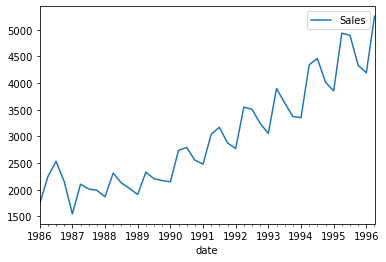

In [96]:
coca_cola.plot()

###     2)  Moving Average 

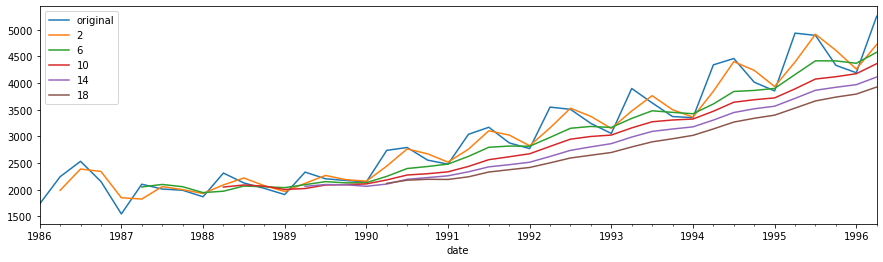

In [97]:
plt.figure(figsize=(15,4))
coca_cola.Sales.plot(label="original")
for i in range(2,20,4):
    coca_cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

###     3)   Time Series Decomposition Plot

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-99-d4601d0d3c9b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(coca_cola.Sales,freq=8)


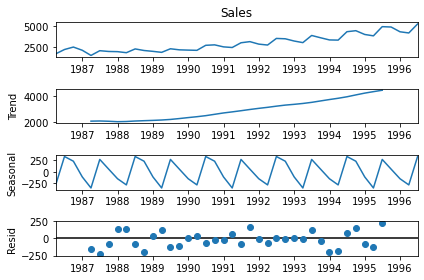

In [99]:
decompose_ts_add = seasonal_decompose(coca_cola.Sales,freq=8)
decompose_ts_add.plot()
plt.show() 

##    DIfferent Data Driven Models

###    Evaluating model using MAPE

In [100]:
def MAPE(pred,original):
    temp = np.abs((pred-original)/original)*100
    return np.mean(temp)

###     1)  Simple Exponential Method

In [101]:
simple_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_simple = simple_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_simple,test.Sales) 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


16.5540362377638

###   2)  Holt method

In [102]:
holt_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Sales) 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-102-7d50bccd447b>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holt_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


9.383070866255766

###    3)  Holts winter exponential smoothing with additive seasonality and additive trend

In [103]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=6).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


10.28380992437407

###    4)  Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [104]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=6).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


10.223424028894238

##  Building Final  Model 

In [105]:
holt_model = Holt(coca_cola["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-105-9cdc3ec914c3>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holt_model = Holt(coca_cola["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


In [106]:
holt_model.forecast(10)

1996-09-30    5218.926351
1996-12-31    5381.588635
1997-03-31    5544.250918
1997-06-30    5706.913202
1997-09-30    5869.575485
1997-12-31    6032.237768
1998-03-31    6194.900052
1998-06-30    6357.562335
1998-09-30    6520.224619
1998-12-31    6682.886902
Freq: Q-DEC, dtype: float64

###    Thus forecasted for the next two and half years using data driven method 